<a href="https://colab.research.google.com/github/negarhonarvar/Machine-Learning/blob/main/HW2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


I also checked the BMI,Age and avg colostrol level for their possible and also missing values.

# Experimenting on Dataset

In [ ]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
data['hypertension'].unique()

array([0, 1])

In [ ]:
data['heart_disease'].unique()

array([0, 1])

In [ ]:
data['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [ ]:
data['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
data['smoking_status'].unique()
data['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

#Handling missing values

By checking diffrent columns of the dataset I found out that 'smoking_status' and 'bmi' columns have missing values shown as NaN

For handling this missing data we have 2 major solutions :

1- we can remove this samples from our dataset if our dataset is large enough

2- we can use data imputation methods

this dataset has over 43000 samples so we can safely remove such examples.we can check if the dataset size shrinks heavily to decide whether to continue with removing or using dataimputation

In [ ]:
data['bmi'].isna().sum()

0

In [ ]:
data['smoking_status'].isna().sum()

0

in worst possible case we will almost 1/3 of our dataset if we remove samples with missing values. so we use data imputation methods to work with such datas
we use Average method for bmi and for smoking status we replace the missing values with "never smoked" value , since its the most used value

In [ ]:
data['smoking_status'].fillna('never smoked',inplace = True)
data['smoking_status'].value_counts()

never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

As mentioned earlier, the NaN values of bmi column gonna be replaces with mean of this column values. now we take a step further in feature engineering , for next step we will discrete the age to ranges (binning method) and normalize bmi and glucose level

In [ ]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

# Feature Engineering

In [ ]:
for index, row in data.iterrows():
    if row['age'] < 20:
        data.at[index, 'age'] = 'teen'
    if row['age'] >= 20 and row['age'] < 40:
        data.at[index , 'age'] = 'young adults'
    if row['age'] >= 40 and row['age'] <60:
        data.at[index, 'age'] = 'adults'
    if row['age'] >= 60 :
        data.at[index, 'age'] = 'middle age adults'
data['age'].value_counts()

adults               13090
middle age adults    11127
young adults         10672
teen                  8511
Name: age, dtype: int64

In next step we turn the columns with 2 options to binary

In [ ]:
lblenc=LabelEncoder()
zero_one_valued = ['ever_married','Residence_type']
for col in zero_one_valued:
  data[col] = lblenc.fit_transform(data[col])
# for No and Rural its 0 and for yes and Urban is 1
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,teen,0,0,0,children,0,95.12,18.0,never smoked,0
1,30468,Male,adults,1,0,1,Private,1,87.96,39.2,never smoked,0
2,16523,Female,teen,0,0,0,Private,1,110.89,17.6,never smoked,0
3,56543,Female,middle age adults,0,0,1,Private,0,69.04,35.9,formerly smoked,0
4,46136,Male,teen,0,0,0,Never_worked,0,161.28,19.1,never smoked,0


Last step of our feature engineering task is to OneHot the columns with multiple values , this would be gender , age , work_type ,avg_glucose_type, bmi and smoking_status but before that we drop the id column since it has no efect on possibility of stroke

In [ ]:
data.drop(columns='id',inplace=True)

In [ ]:
temp=data

In [ ]:
temp.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,teen,0,0,0,children,0,95.12,18.0,never smoked,0
1,Male,adults,1,0,1,Private,1,87.96,39.2,never smoked,0
2,Female,teen,0,0,0,Private,1,110.89,17.6,never smoked,0
3,Female,middle age adults,0,0,1,Private,0,69.04,35.9,formerly smoked,0
4,Male,teen,0,0,0,Never_worked,0,161.28,19.1,never smoked,0


In [ ]:
enc = OneHotEncoder(sparse=False)
age = enc.fit_transform(data[['age']])
enc_data1 = pd.DataFrame(age, columns=enc.get_feature_names_out(['age']))
temp.drop(columns='age', inplace=True )

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
gender = enc.fit_transform(data[['gender']])
enc_data2 = pd.DataFrame(gender, columns=enc.get_feature_names_out(['gender']))
temp.drop(columns='gender', inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
work = enc.fit_transform(data[['work_type']])
enc_data3 = pd.DataFrame(work, columns=enc.get_feature_names_out(['work_type']))
temp.drop(columns='work_type', inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
smoking_status = enc.fit_transform(data[['smoking_status']])
enc_data6 = pd.DataFrame(smoking_status, columns=enc.get_feature_names_out(['smoking_status']))
temp.drop(columns='smoking_status', inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
OneHotData = temp.join(enc_data1)
OneHotData = OneHotData.join(enc_data2)
OneHotData = OneHotData.join(enc_data3)
OneHotData = OneHotData.join(enc_data6)
OneHotData.head()

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_adults,age_middle age adults,age_teen,...,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,0,0,0,95.12,18.0,0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0,1,1,87.96,39.2,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,1,110.89,17.6,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1,0,69.04,35.9,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,161.28,19.1,0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Now we should normalize bmi and glucose level

In [ ]:
first_column = OneHotData.pop('stroke')
OneHotData.insert(21, 'stroke', first_column)
OneHotData

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_adults,age_middle age adults,age_teen,age_young adults,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0,0,0,95.12,18.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,1,0,1,1,87.96,39.2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0,0,0,1,110.89,17.6,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,0,0,1,0,69.04,35.9,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0,0,0,0,161.28,19.1,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0,0,1,58.64,20.4,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
43396,0,0,1,1,213.61,55.4,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
43397,1,0,1,1,91.94,28.9,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
43398,0,0,1,1,99.16,33.2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [ ]:
d = preprocessing.normalize(OneHotData.iloc[:,0:21])
scaled_df = pd.DataFrame(d, columns=OneHotData.iloc[:,0:21].columns)
scaled_df.insert(21, 'stroke', first_column)
scaled_df

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_adults,age_middle age adults,age_teen,age_young adults,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.000000,0.0,0.000000,0.000000,0.982352,0.185895,0.000000,0.000000,0.010328,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.010328,0.000000,0.010328,0.0,0
1,0.010380,0.0,0.010380,0.010380,0.913055,0.406910,0.010380,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.010380,0.0,0.000000,0.000000,0.010380,0.0,0
2,0.000000,0.0,0.000000,0.008905,0.987442,0.156723,0.000000,0.000000,0.008905,0.0,...,0.0,0.000000,0.000000,0.008905,0.0,0.000000,0.000000,0.008905,0.0,0
3,0.000000,0.0,0.012846,0.000000,0.886855,0.461154,0.000000,0.012846,0.000000,0.0,...,0.0,0.000000,0.000000,0.012846,0.0,0.000000,0.012846,0.000000,0.0,0
4,0.000000,0.0,0.000000,0.000000,0.992985,0.117597,0.000000,0.000000,0.006157,0.0,...,0.0,0.000000,0.006157,0.000000,0.0,0.000000,0.000000,0.006157,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.000000,0.0,0.000000,0.016096,0.943867,0.328358,0.000000,0.000000,0.016096,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.016096,0.000000,0.016096,0.0,0
43396,0.000000,0.0,0.004531,0.004531,0.967916,0.251030,0.004531,0.000000,0.000000,0.0,...,0.0,0.004531,0.000000,0.000000,0.0,0.000000,0.004531,0.000000,0.0,0
43397,0.010372,0.0,0.010372,0.010372,0.953621,0.299757,0.000000,0.010372,0.000000,0.0,...,0.0,0.000000,0.000000,0.010372,0.0,0.000000,0.010372,0.000000,0.0,0
43398,0.000000,0.0,0.009560,0.009560,0.948002,0.317403,0.009560,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.009560,0.0,0.000000,0.000000,0.009560,0.0,0


In next step we want to split data into test and train . but before that we need to make sure that we don't face overfitting. we can use a number of tricks to avoid this problem. we shall do so starting with Data Augmentation

In [ ]:
data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

Number of possible strokes is so less it can be considered outlier.If we want our model to weok well we need to have equal number of samples for both classes so we should make sure that our training data includes enough number of positive samples to be capable of currect prediction , we shall overcome the problem of imbalaceness of our dataset as follows :

1- we can remove samples from majority class which can lead to losing valuable data

2- we can add samples to minority class

I choose the second approach

In [ ]:
x= scaled_df.iloc[:,0:21]
y= scaled_df.iloc[:,21:22]
# choose the test size based on scikit learn documantation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x = x_train.join(y_train)
x

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_adults,age_middle age adults,age_teen,age_young adults,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
10092,0.000000,0.0,0.000000,0.009391,0.963017,0.268622,0.000000,0.000000,0.009391,0.000000,...,0.0,0.0,0.0,0.009391,0.0,0.00000,0.009391,0.000000,0.000000,0
2613,0.000000,0.0,0.008623,0.000000,0.980292,0.196610,0.000000,0.008623,0.000000,0.000000,...,0.0,0.0,0.0,0.008623,0.0,0.00000,0.000000,0.008623,0.000000,0
34426,0.011732,0.0,0.011732,0.011732,0.954062,0.297998,0.011732,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.011732,0.0,0.00000,0.000000,0.011732,0.000000,0
32207,0.000000,0.0,0.000000,0.000000,0.919630,0.392370,0.000000,0.000000,0.000000,0.009041,...,0.0,0.0,0.0,0.009041,0.0,0.00000,0.009041,0.000000,0.000000,0
30105,0.000000,0.0,0.008175,0.000000,0.985409,0.169221,0.008175,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.008175,0.0,0.00000,0.000000,0.000000,0.008175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35433,0.000000,0.0,0.000000,0.000000,0.991449,0.129335,0.000000,0.000000,0.008680,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.00868,0.000000,0.008680,0.000000,0
28250,0.000000,0.0,0.014053,0.000000,0.934129,0.355551,0.000000,0.000000,0.000000,0.014053,...,0.0,0.0,0.0,0.014053,0.0,0.00000,0.000000,0.014053,0.000000,0
24923,0.000000,0.0,0.000000,0.000000,0.927160,0.373727,0.000000,0.000000,0.000000,0.013253,...,0.0,0.0,0.0,0.013253,0.0,0.00000,0.013253,0.000000,0.000000,0
26875,0.000000,0.0,0.009151,0.009151,0.984024,0.176617,0.009151,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.009151,0.0,0.00000,0.000000,0.009151,0.000000,0


In [ ]:
class_0 = x[x['stroke'] == 0]
class_1 = x[x['stroke']  == 1]
class_1

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_adults,age_middle age adults,age_teen,age_young adults,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
39705,0.0,0.000000,0.011557,0.000000,0.931024,0.364042,0.000000,0.011557,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.011557,0.0,0.00000,0.011557,0.000000,1
31699,0.0,0.013081,0.000000,0.013081,0.951883,0.304781,0.000000,0.013081,0.0,0.0,...,0.0,0.013081,0.0,0.000000,0.000000,0.0,0.00000,0.013081,0.000000,1
37119,0.0,0.000000,0.004620,0.004620,0.992640,0.120575,0.000000,0.004620,0.0,0.0,...,0.0,0.000000,0.0,0.004620,0.000000,0.0,0.00462,0.000000,0.000000,1
14791,0.0,0.000000,0.010802,0.000000,0.917744,0.396436,0.010802,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.010802,0.000000,0.0,0.00000,0.010802,0.000000,1
13283,0.0,0.000000,0.012802,0.000000,0.931120,0.363589,0.000000,0.012802,0.0,0.0,...,0.0,0.000000,0.0,0.012802,0.000000,0.0,0.00000,0.012802,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24199,0.0,0.000000,0.000000,0.009609,0.961246,0.274855,0.009609,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.009609,0.000000,0.0,0.00000,0.000000,0.009609,1
8161,0.0,0.000000,0.004757,0.004757,0.986053,0.166023,0.000000,0.004757,0.0,0.0,...,0.0,0.000000,0.0,0.004757,0.000000,0.0,0.00000,0.004757,0.000000,1
39764,0.0,0.000000,0.000000,0.011029,0.960923,0.275715,0.011029,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.011029,0.0,0.00000,0.000000,0.011029,1
20682,0.0,0.000000,0.011170,0.011170,0.959503,0.280367,0.011170,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.011170,0.000000,0.0,0.01117,0.000000,0.000000,1


In [ ]:
class_1_over = class_1.sample(len(class_0.index), replace=True)
balanced_data = pd.concat([class_1_over, class_0], axis=0)
balanced_data.head()

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_adults,age_middle age adults,age_teen,age_young adults,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
6803,0.012362,0.000000,0.012362,0.000000,0.940848,0.337474,0.0,0.012362,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.012362,0.0,0.000000,0.000000,0.012362,1
42105,0.000000,0.000000,0.009284,0.000000,0.957742,0.286877,0.0,0.009284,0.0,0.0,...,0.0,0.0,0.0,0.009284,0.000000,0.0,0.000000,0.009284,0.000000,1
16303,0.010371,0.010371,0.010371,0.000000,0.967065,0.253044,0.0,0.010371,0.0,0.0,...,0.0,0.0,0.0,0.010371,0.000000,0.0,0.010371,0.000000,0.000000,1
19828,0.003878,0.000000,0.003878,0.003878,0.994733,0.101986,0.0,0.003878,0.0,0.0,...,0.0,0.0,0.0,0.003878,0.000000,0.0,0.000000,0.003878,0.000000,1
1315,0.000000,0.004743,0.004743,0.000000,0.987979,0.154149,0.0,0.004743,0.0,0.0,...,0.0,0.0,0.0,0.004743,0.000000,0.0,0.000000,0.004743,0.000000,1


In [ ]:
x_train = balanced_data.iloc[:,0:21]
y_train = balanced_data.iloc[:,21:22]

# Training

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.713479262672811

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

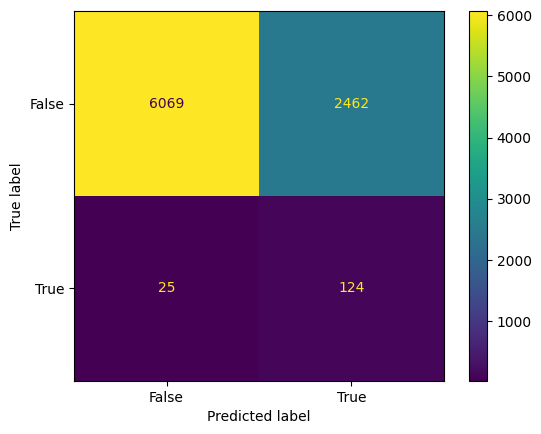

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

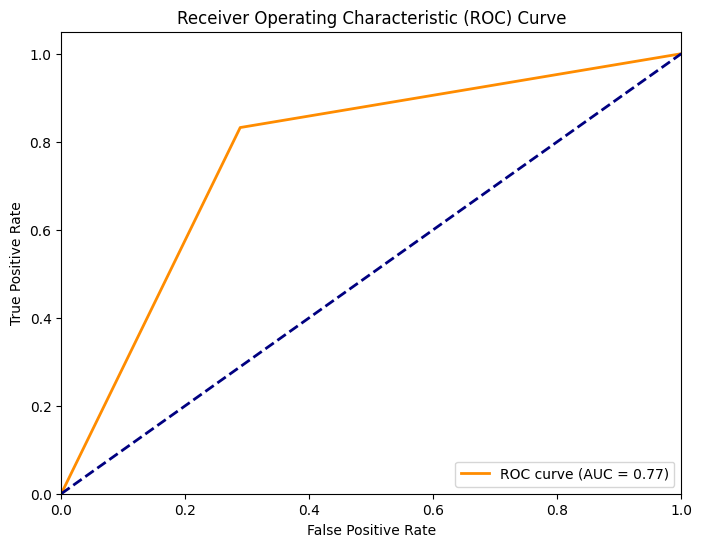

In [ ]:
fpr, tpr, threshholds = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

we could also handle the unbalanced data problem with svm fit function by setting the class_weight in fit method to 1